
# Lead Scoring - Case study

##### By - Phani, ganesh.S, mallesh H.G

Objective:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used 
by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert 
whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Importing libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


import statsmodels.api as sm

%matplotlib inline

#### Reading and Understanding data

In [2]:
# Loading dataset
dataset = pd.read_csv('Leads.csv', encoding=' ISO-8859-1')
dataset.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
dataset.shape

(9240, 37)

In [4]:
dataset.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From the above info we can see that few columns have null values.

In [6]:
# The columns having null values:
print((dataset.columns[dataset.isna().any()]))

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [7]:
# Checking the missing values
dataset.isna().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Treating the data

Dropping Prospect ID column as we dont need this column for our analysis

In [9]:
# Dropping Prospect ID column
dataset.drop('Prospect ID', axis = 1, inplace = True)

In [10]:
## There are columns with value 'Select'- Specialization, How did you hear about X Education, Lead Profile, and City. 
## It is equivalent to Null as it does not holds any meaning for these columns.
## So replacing 'Select' with NaN.

dataset = dataset.replace('Select', np.nan)

In [11]:
dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
## Finding the null percentage for all the columns:
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# We do not want to lose much information by dropping all the null values. 
# So we drop columns having null values of more than 70%
# This implies we will be dropping the column 'Lead Profile' which anyways is not important from our business aspect, as 
# we will be applying logistic algorithm to find out the hot leads.
# Another column that will get dropped is 'How did you hear about X Education'. 
# this column won't be useful as it has very high Null values.

dataset1= dataset.loc[:, round(100*(dataset.isnull().sum()/len(dataset.index)), 2) < 70]
dataset1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
## Finding the null percentage for all the columns of the new dataframe:
# After dropping missing value columns
round(100*(dataset1.isnull().sum()/len(dataset1.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# The next column with highest null value is 'Lead Quality'
dataset1['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

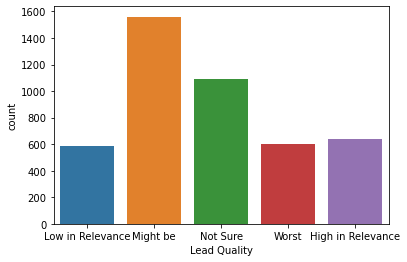

In [16]:
# So there are 5 unique counts in the column
sns.countplot(dataset1['Lead Quality'])
plt.show()

According to the definition `Lead Quality` is defined as the quality of lead based on the data and intuition of the employee who has been assigned to the lead.

In [17]:
# As the rating is based on the intuition of the employee based omn how the communication went. 
# Let's find out the rating having highest frequency.
dataset1['Lead Quality'].mode()

0    Might be
Name: Lead Quality, dtype: object

In [18]:
# Thus replacing null values with 'Might be' as we do not want to lose any potential customers.
dataset1['Lead Quality'] = dataset1['Lead Quality'].replace(np.nan, 'Might  be')

In [19]:
# Checking for missing values in Lead Quality column
dataset1['Lead Quality'].isnull().sum()

0

`Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score`
are defined as an index and score assigned to each customer based on their activity and their profile


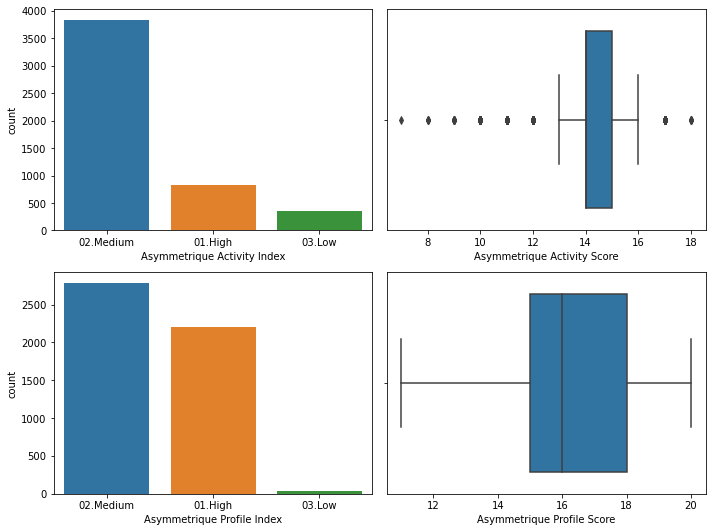

In [20]:
# Visualizing the variables
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(dataset1['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(dataset1['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(dataset1['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(dataset1['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

We are not getting any business insight also there is too mjuch variation. We can drop the columns.

In [21]:
df= dataset1.copy()
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [23]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [24]:
#Use skew() function to find the skewness in data 
round(df.skew(skipna=True),2)

Lead Number                     0.14
Converted                       0.47
TotalVisits                    19.91
Total Time Spent on Website     0.96
Page Views Per Visit            2.87
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.

We can thus see that `TotalVisits`is highly skewed towards right. So we need to treat the outlier and see.

In [25]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

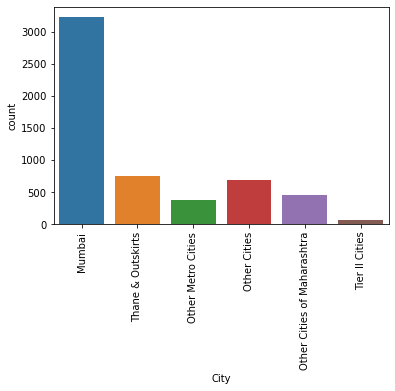

In [26]:
sns.countplot(df.City)
xticks(rotation = 90)
plt.show()

In [27]:
# Around 58% of the total data is city 'Mumbai'. So we will impute Mumbai for NaN values.
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [28]:
# Verifying the null values for all the columns now again after imputing the values for 'City'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

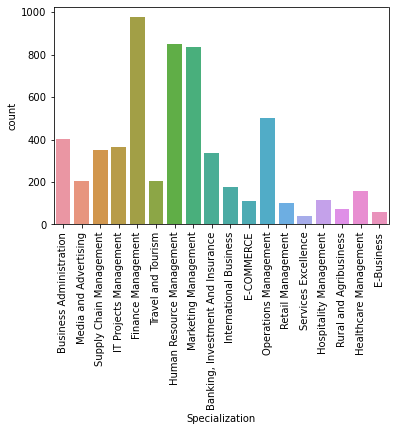

In [29]:
# The next column with highest NaN values is Specialization
sns.countplot(df.Specialization)
xticks(rotation=90)
plt.show()

As can be inferred from the plot 'Finance Management' has highest frequency. By definition `Specialization` is the industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [30]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Now here there are few scenarios that we need to consider: Firstly, maybe the customer has not entered any Specialization because it might not be available on the list. Secondly, the customer may be a student having no Specialization.
So we shall impute 'Others' which means that the customer has not chosen any given options.

In [31]:
df.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [32]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [33]:
# Verifying again
df.Specialization.unique()

array(['Others', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [34]:
# Verifying the null values for all the columns now again after imputing the values for 'Specialization'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

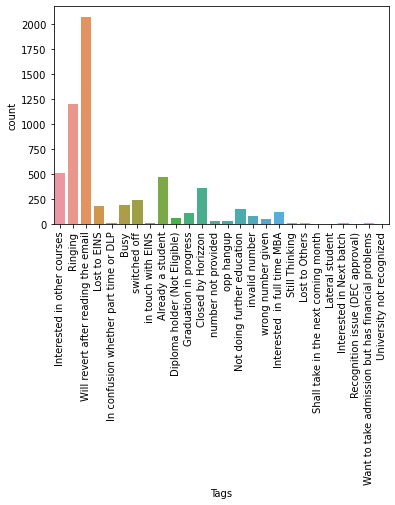

In [35]:
# The next column with highest NaN  values is 'Tags'
sns.countplot(df.Tags)
xticks(rotation=90)
plt.show()

In [36]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

As can be seen value 'Will revert after reading the email' has the highest frequency. `Tags` is defined as the tags assigned to customers indicating the current status of the lead.

In [37]:
df.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [38]:
# So here we shall impute with the value 'Will revert after reading the email'
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [39]:
# Verifying the null values for all the columns now again after imputing the values for 'Tags'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

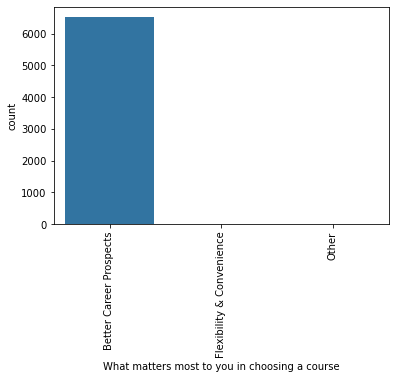

In [40]:
# the next column with highest NaN values is 'What matters most to you in choosing a course'
sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation=90)
plt.show()

In [41]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

Now in this scenario we can say that it can either be imputed by 'Other' or by 'What matters most to you in choosing a course' for NaN values. But we will choose the value 'What matters most to you in choosing a course' as it has the highest frequency and also if we look from a business perspective any customer would take  certain courses for better oppurtunities.

In [42]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [43]:
# Verifying the null values for all the columns now again after imputing the values for 'What matters most to you in choosing a course'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

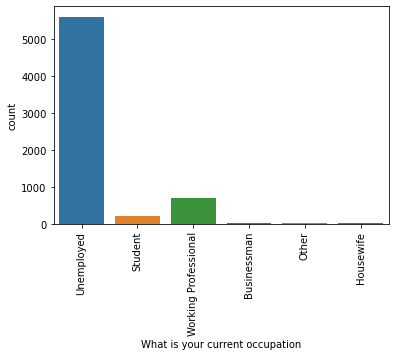

In [44]:
# The next column with highest NaN values is 'What is your current occupation'
sns.countplot(df['What is your current occupation'])
xticks(rotation=90)
plt.show()

In [45]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [46]:
# In this case around 85% of the records have values 'Unemployed'.
# From business aspect we might infer that NaN values should be imputed to 'Other'.
# However here we will go along with the data and will impute NaN values with 'Unemployed'.

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [47]:
# Verifying the null values for all the columns now again after imputing the values for 'What is your current occupation'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [48]:
# The next column with highest NaN values is 'Country'.
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [49]:
df.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [50]:
#As India has the highest frequency we would impute 'India' for NaN values.

df['Country'] = df['Country'].replace(np.nan, 'India')

In [51]:
# Verifying the null values for all the columns now again after imputing the values for 'Country'
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Now the remaining columns has around 3% of the missing data which is very less. 
As it would not impact our EDA we would keep it as it is.

### Exploratory Analysis:

In [52]:
# Converted by definition implies the target variable. Indicates whether a lead has been successfully converted or not.
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted


38.53896103896104

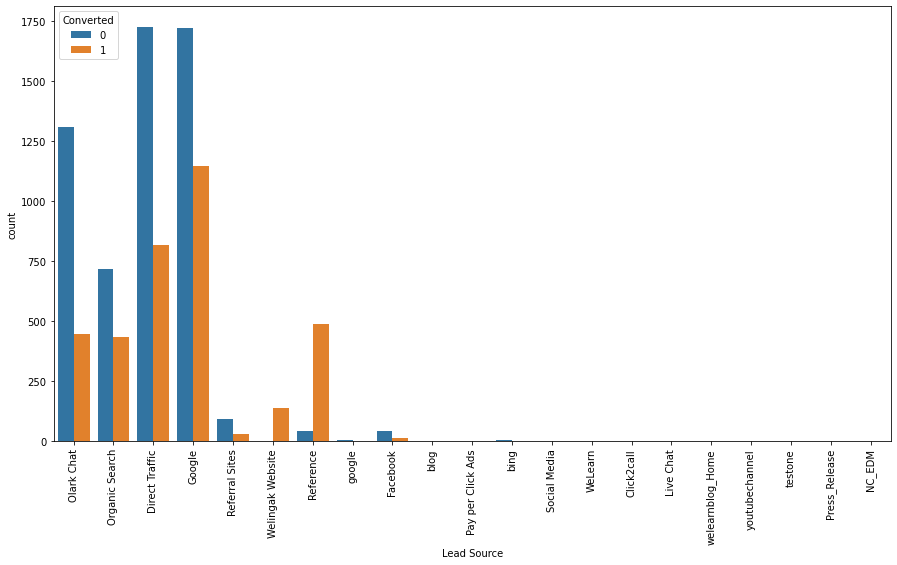

In [53]:
# Lead Source- The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [54]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

As can be seen 'Google' and 'google' both are same. Also, from the plot we can categorize 'blog', 'Pay per Click Ads', 'bing',
'Social Media', 'WeLearn', 'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM' into 'Other_Platforms'.

In [55]:
df['Lead Source'] = df['Lead Source'].fillna('Null')  # For nan values we can replace it as Null value

In [56]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'Null', 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [57]:
# Modifying 'google' to 'Google'
# Replacing all other categories having low or no conversion into other platforms.
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

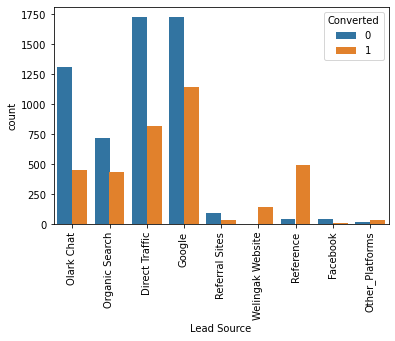

In [58]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

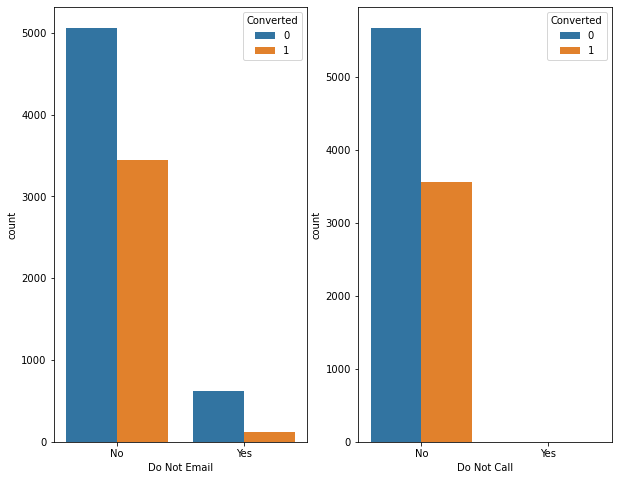

In [59]:
fig, axs = plt.subplots(1,2,figsize = (10,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])
plt.show()

##### Treating the Outliers:

In [60]:
cols = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

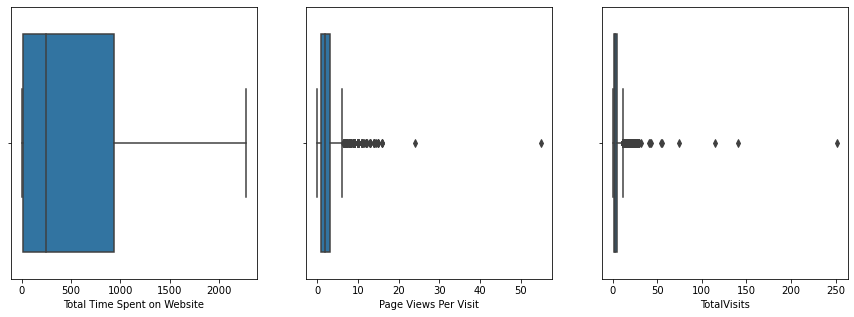

In [61]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df[col])
plt.show()

In [62]:
# Removing outliers using 1.5 IQR method
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

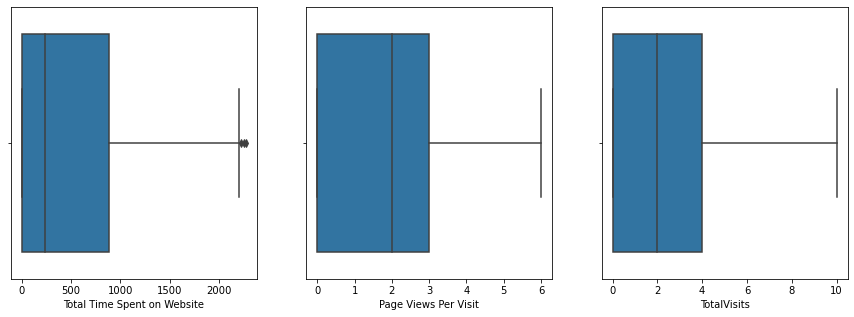

In [63]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df[col])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Unsubscribed'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

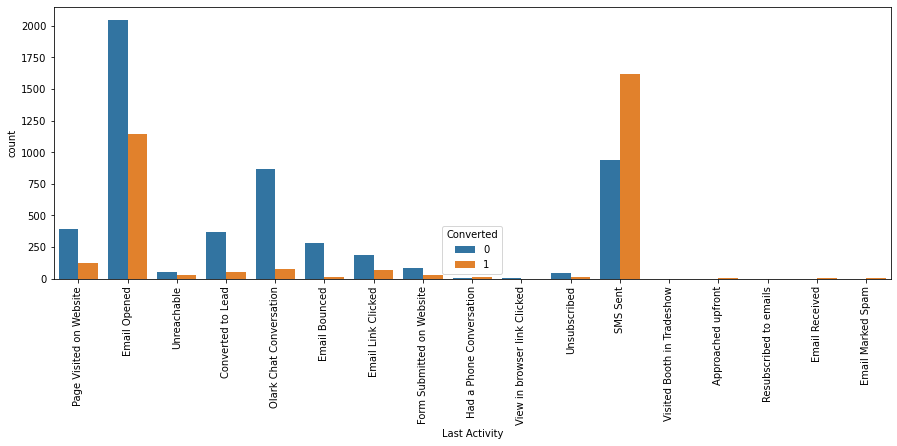

In [64]:
# Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [65]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Unsubscribed', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Approached upfront', 'Resubscribed to emails', 'Email Received',
       'Email Marked Spam'], dtype=object)

As can be seen the `Last Activity` the categories - 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam' so we group them in Other_Activity.

In [66]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                     'Other_Activity')

In [67]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Other_Activity', 'Unsubscribed', 'SMS Sent'], dtype=object)

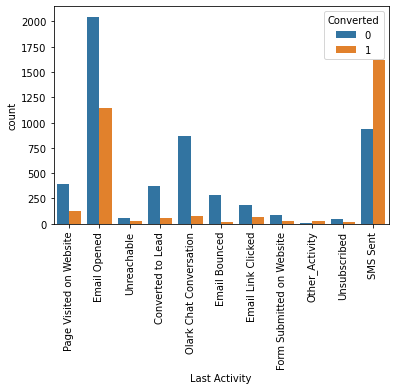

In [68]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Conversion rate is much higher by SMS Sent.

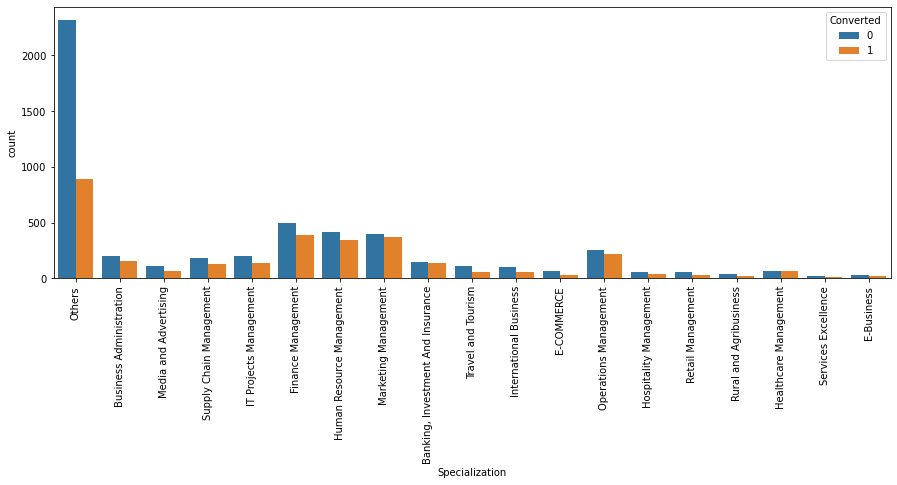

In [69]:
# Visualizing Specialization
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Conversion rate is much higher with Specialization as 'Others'.

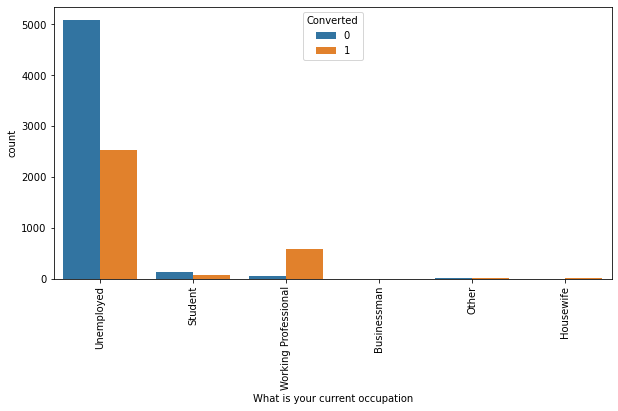

In [70]:
#Visualizing Occupation
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Conversion rate is much higher for Unemployed.

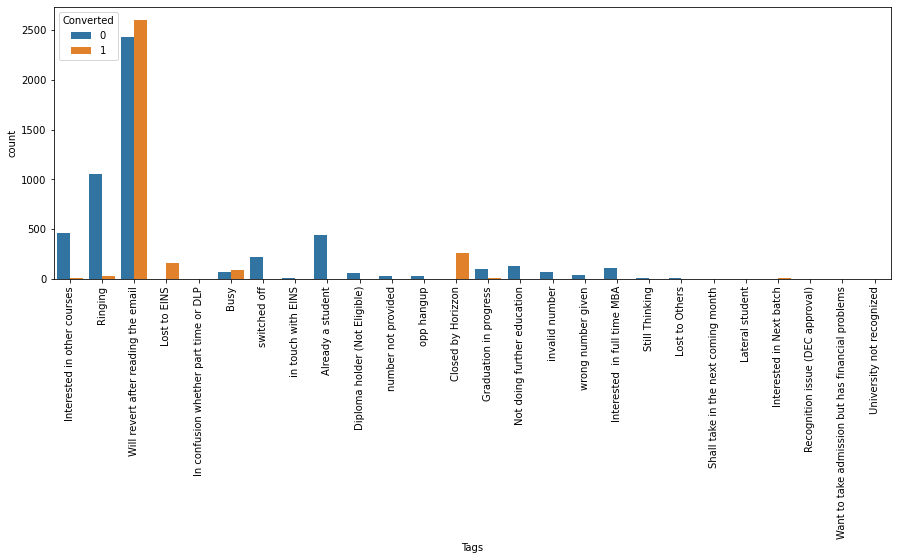

In [71]:
# Visualization for Tags
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Conversion rate is higher in 'Will revert after reading the email'. 

In [72]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [73]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'Other_Tags', 'Busy', 'switched off', 'Already a student',
       'Closed by Horizzon', 'Not doing further education',
       'invalid number', 'wrong number given',
       'Interested  in full time MBA'], dtype=object)

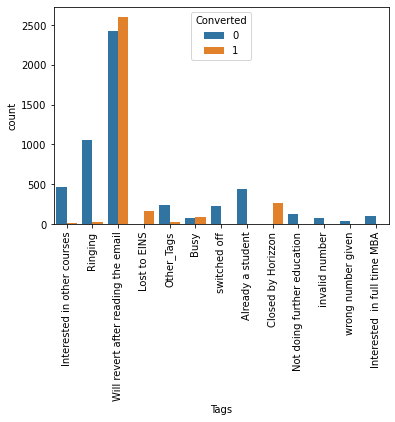

In [74]:
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [75]:
df.Country.describe()

count      8474
unique       38
top       India
freq       8207
Name: Country, dtype: object

Most values are 'India'. No inference can be drawn from here.

In [76]:
#Indicating whether the customer had seen the ad in any of the listed items.
df.Search.describe()

count     8474
unique       2
top         No
freq      8468
Name: Search, dtype: object

Mostly are 'No'. No inference can be drawn from here.

In [77]:
df.Magazine.describe()

count     8474
unique       1
top         No
freq      8474
Name: Magazine, dtype: object

Mostly are 'No'. No inference can be drawn.

In [78]:
df['Newspaper Article'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Newspaper Article, dtype: object

Mostly are 'No'. No inference can be drawn.

In [79]:
df['X Education Forums'].describe()

count     8474
unique       1
top         No
freq      8474
Name: X Education Forums, dtype: object

Mostly are 'No'. No inference can be drawn.

In [80]:
df['Newspaper'].describe()

count     8474
unique       2
top         No
freq      8473
Name: Newspaper, dtype: object

Mostly are 'No'. No inference can be drawn.

In [81]:
df['Digital Advertisement'].describe()

count     8474
unique       2
top         No
freq      8472
Name: Digital Advertisement, dtype: object

Mostly are 'No'. No inference can be drawn.

In [82]:
df['Through Recommendations'].describe()

count     8474
unique       2
top         No
freq      8471
Name: Through Recommendations, dtype: object

Mostly are 'No'. No inference can be drawn.

In [83]:
df['Receive More Updates About Our Courses'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Receive More Updates About Our Courses, dtype: object

Mostly are 'No'. No inference can be drawn.

In [84]:
#Indicates whether the customer wants updates on the Supply Chain Content

df['Update me on Supply Chain Content'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Update me on Supply Chain Content, dtype: object

No inference can be drawn from here as most of the values are 'No'.

In [85]:
#Indicates whether the customer wants updates on the DM Content.

df['Get updates on DM Content'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Get updates on DM Content, dtype: object

No inference can be drawn from here as mostly the values are 'No'.

In [86]:
# Indicates whether the customer has agreed to pay the amount through cheque or not.

df['I agree to pay the amount through cheque'].describe()

count     8474
unique       1
top         No
freq      8474
Name: I agree to pay the amount through cheque, dtype: object

Mostly the values are 'No', so no inference can be drawn from here.

In [87]:
# Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

df['A free copy of Mastering The Interview'].describe() 

count     8474
unique       2
top         No
freq      5939
Name: A free copy of Mastering The Interview, dtype: object

Mostly the values are 'No', so no inference can be drawn from here.

In [88]:
# The last notable acitivity performed by the student.

df['Last Notable Activity'].describe()

count         8474
unique          16
top       Modified
freq          3111
Name: Last Notable Activity, dtype: object

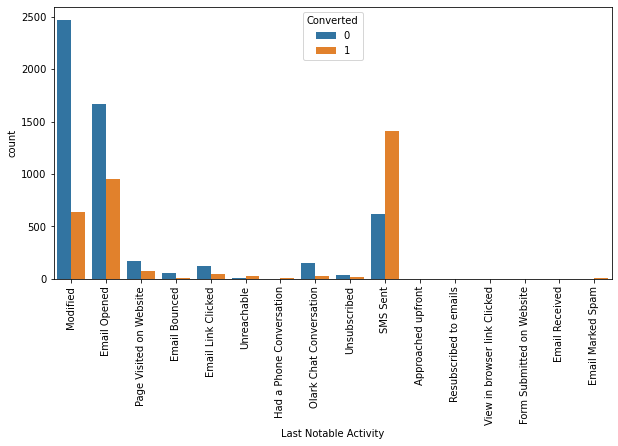

In [89]:
# Visualizing the column.
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [90]:
df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

We can see that values- 'Approached upfront','Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam' has no values at all.

In [91]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Approached upfront',
                             'Resubscribed to emails', 'View in browser link Clicked',
                              'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 
                                                                  'Other_Last_Notable_Activity')

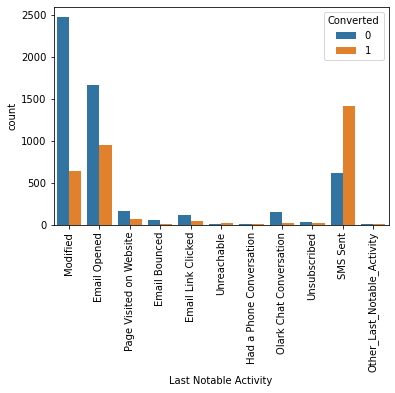

In [92]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [93]:
df['What matters most to you in choosing a course'].describe()

count                        8474
unique                          3
top       Better Career Prospects
freq                         8472
Name: What matters most to you in choosing a course, dtype: object

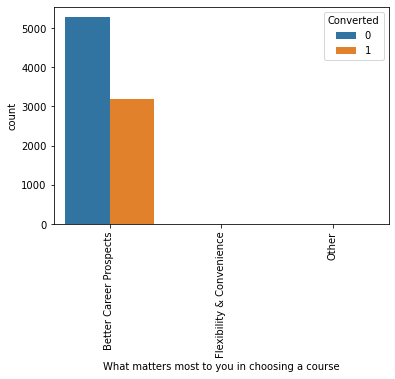

In [94]:
# An option selected by the customer indicating what is their main motto behind doing this course.

sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

As can be seen from the above plot even though the reason chosen by the candidate to choose a particular course is 'Better Career Prospects' the conversion rate is very low as compared to the other.

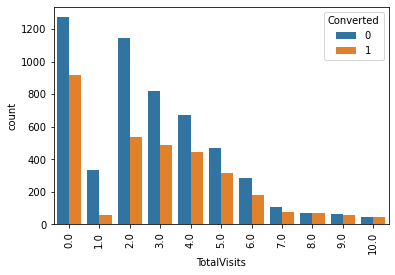

In [95]:
# The total number of visits made by the customer on the website.

sns.countplot(x = "TotalVisits", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

As can be seen from the above plot leads who have not visited the site even once have been converted into paying customers more. This implies that X Education needs to work on its website more.

In [96]:
df.skew()

Lead Number                    0.139171
Converted                      0.509606
TotalVisits                    0.723748
Total Time Spent on Website    1.017632
Page Views Per Visit           0.394822
dtype: float64

Now from the above visualization and analysis we come to the conclusion that columns- 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'.

In [97]:
# We will drop all those columns that are not relevant from our business perspective.

new_df= df.copy()

In [98]:
new_df= new_df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview'],1)

In [99]:
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [100]:
new_df.shape

(8474, 17)

In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8474 non-null   int64  
 1   Lead Origin                      8474 non-null   object 
 2   Lead Source                      8474 non-null   object 
 3   Do Not Email                     8474 non-null   object 
 4   Do Not Call                      8474 non-null   object 
 5   Converted                        8474 non-null   int64  
 6   TotalVisits                      8474 non-null   float64
 7   Total Time Spent on Website      8474 non-null   int64  
 8   Page Views Per Visit             8474 non-null   float64
 9   Last Activity                    8474 non-null   object 
 10  Country                          8474 non-null   object 
 11  Specialization                   8474 non-null   object 
 12  What is your current

In [102]:
# percentage rows retained
f'{round(100 * (new_df.shape[0] / dataset.shape[0]))} % row is retained after missing value and outliers treatment.'

'92 % row is retained after missing value and outliers treatment.'

#### Uni Variate Analysis

In [103]:
# Total Visits
new_df['TotalVisits'].describe()

count    8474.000000
mean        2.744985
std         2.331743
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [104]:
# COnvert the values in TotalVisits to int

new_df['TotalVisits'] = new_df['TotalVisits'].astype(int)

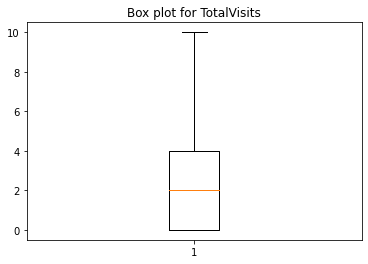

In [105]:
# plot a box plot.
plt.boxplot(new_df['TotalVisits'])
plt.title('Box plot for TotalVisits')
plt.show()

In [106]:
# Total Time Spent of Website
new_df['Total Time Spent on Website'].describe()

count    8474.000000
mean      466.969554
std       541.462149
min         0.000000
25%         0.000000
50%       231.000000
75%       884.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

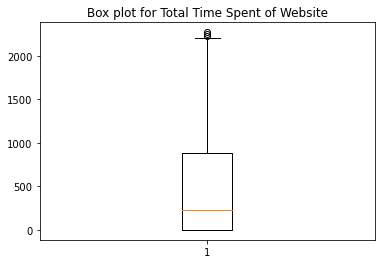

In [107]:
# plot a box plot.
# plt.figure(figsize=(7,4))
plt.boxplot(new_df['Total Time Spent on Website'])
plt.title('Box plot for Total Time Spent of Website')
plt.show()

In [108]:
# Outliers handling for the column Page Views Per Visit
new_df['Page Views Per Visit'].describe()

count    8474.000000
mean        2.065103
std         1.650505
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

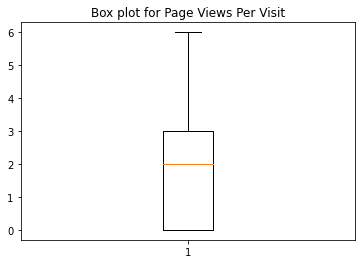

In [109]:
# Plot a box plot for Page Views Per Visit
plt.boxplot(new_df['Page Views Per Visit'])
plt.title('Box plot for Page Views Per Visit')
plt.show()

By seeing the Numeric values of analysis we are getting mean value below or near to 2 in Total visits & Page Views Per Visit

### Bi variate/Multi Variate Analysis

In [110]:
new_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [111]:
new_df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.027578,0.059912,0.023074,0.070690
Converted,0.027578,1.000000,0.035594,0.338312,-0.007444
TotalVisits,0.059912,0.035594,1.000000,0.391532,0.770158
Total Time Spent on Website,0.023074,0.338312,0.391532,1.000000,0.392309
Page Views Per Visit,0.070690,-0.007444,0.770158,0.392309,1.000000


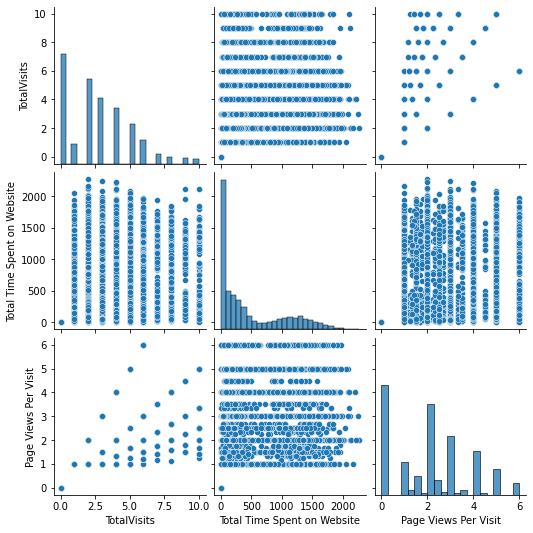

In [112]:
# Plot a pair plot for the columns 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
sns.pairplot(new_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

Except for TotalVisits and Page Views Per Visit there is no proper correlation among others.

As the number of Total Visits to the website increases, the maximum number of pages viewed is increased but the minimum number of pages viewd remains same between 0-2.

#### Data Preparation:

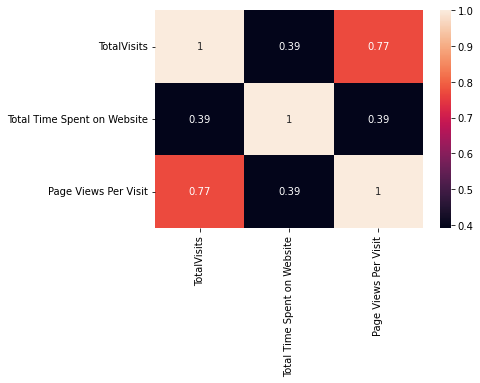

In [113]:
# Now we will plot a heatmap to verify the correlation of the variables.
sns.heatmap(new_df.drop(['Lead Number', 'Converted'], axis = 1).corr(),annot=True)
plt.show()

In [114]:
# Creating dummy variables:

# converting binary variables Yes/No to 1/0

yes_no_cols = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

new_df[yes_no_cols] = new_df[yes_no_cols].apply(binary_map) 

In [115]:
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,0,0,0,5,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [116]:
columns_for_dummies = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation','Lead Quality','Tags', 'City', 'Last Notable Activity']

In [117]:
# creating dummy columns
dummies = pd.get_dummies(new_df[columns_for_dummies], drop_first=True)

# concat with original data set
new_df = pd.concat([new_df, dummies], axis = 1)

In [118]:
new_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [119]:
# dropping the original columns
new_df.drop(columns_for_dummies, axis = 1, inplace = True)
new_df.shape

(8474, 120)

In [120]:
new_df.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,1.000000,-0.095437,0.012636,0.027578,0.059912,0.023074,0.070690,-0.063166,0.022970,0.077940,...,0.017642,0.078149,0.002857,0.073912,-0.033895,-0.007999,0.001177,-0.162859,0.009258,-0.004975
Do Not Email,-0.095437,1.000000,-0.004458,-0.131760,-0.019896,-0.041887,0.010699,0.096844,-0.020278,-0.017294,...,-0.037011,-0.186040,-0.009973,0.115662,-0.013824,0.022355,0.033414,-0.024335,-0.009870,0.251824
Do Not Call,0.012636,-0.004458,1.000000,0.019770,0.011565,0.007776,-0.005261,-0.015998,0.025629,-0.000916,...,-0.002131,-0.010256,-0.000528,0.020173,-0.002218,-0.000442,-0.002612,-0.008621,-0.000916,-0.001123
Converted,0.027578,-0.131760,0.019770,1.000000,0.035594,0.338312,-0.007444,-0.044311,0.319193,-0.009419,...,-0.032658,-0.019296,0.037133,-0.268550,-0.076030,0.020041,-0.027452,0.370378,0.039789,-0.013221
TotalVisits,0.059912,-0.019896,0.011565,0.035594,1.000000,0.391532,0.770158,0.495099,-0.306565,-0.070173,...,-0.019410,0.097999,0.014079,-0.153054,-0.073327,0.017238,0.150624,0.031124,0.021858,0.015652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Other_Last_Notable_Activity,-0.007999,0.022355,-0.000442,0.020041,0.017238,0.009553,0.002201,0.002950,0.008019,-0.001714,...,-0.003989,-0.019193,-0.000988,-0.021899,-0.004151,1.000000,-0.004888,-0.016133,-0.001714,-0.002101
Last Notable Activity_Page Visited on Website,0.001177,0.033414,-0.002612,-0.027452,0.150624,0.025706,0.028778,0.037454,-0.010935,-0.010133,...,-0.023582,-0.113473,-0.005843,-0.129472,-0.024541,-0.004888,1.000000,-0.095381,-0.010133,-0.012421
Last Notable Activity_SMS Sent,-0.162859,-0.024335,-0.008621,0.370378,0.031124,0.130739,0.072244,0.047910,0.130817,-0.028788,...,-0.077837,-0.374536,-0.019286,-0.427342,-0.081000,-0.016133,-0.095381,1.000000,-0.033444,-0.040997
Last Notable Activity_Unreachable,0.009258,-0.009870,-0.000916,0.039789,0.021858,0.009405,0.023423,-0.002408,0.006687,-0.003553,...,-0.008269,-0.039788,-0.002049,-0.045398,-0.008605,-0.001714,-0.010133,-0.033444,1.000000,-0.004355


In [121]:
new_df.set_index('Lead Number', inplace = True)

In [122]:
new_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,0,5,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,1,2,1532,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,0,1,305,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,1,2,1428,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Creating Train Test data set by spliting the original data frame into 70:30 ratio

In [123]:
# Putting feature variable to X
X = new_df.drop(['Converted'], axis=1)

In [124]:
# storing response variable to y
y = new_df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [125]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,5,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,2,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,1,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,2,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [127]:
# Scaling for continuous variables:

scaler = StandardScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit',
                                                                                                               'TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
618332,0,0,0.102041,1.661198,0.554013,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
605316,0,0,-1.181084,-0.862145,-1.253883,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
655685,0,0,0.529750,-0.343448,1.156645,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
581653,0,0,0.529750,0.751170,-0.048619,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
619035,0,0,0.529750,-0.310222,1.156645,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [128]:
### Checking the conversion rate
conversion_rate = (sum(new_df['Converted'])/len(new_df['Converted'].index))*100
conversion_rate

37.65636063252301

We have around 38% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.



#### Model Building:

In [129]:
# Logistic regression model with StatsModels
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5820
Model Family:                Binomial   Df Model:                          110
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.3
Date:                Tue, 24 Jan 2023   Deviance:                       2172.6
Time:                        20:51:05   Pearson chi2:                 6.74e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6161
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -23.9746   1.32e+05     -0.000      1.000   -2.59e+05    2.59e+05
Do Not Email                                            -1.1855      0.338     -3.511      0.000      -1.847      -0.524
Do Not Call                                             20.6487   1.34e+05      0.000      1.000   -2.62e+05    2.62e+05
TotalVisits                                              0.0767      0.095      0.810      0.418      -0.109       0.262
Total Time Spent on Website                              1.0946      0.068     16.056      0.000       0.961       1.228
Page Views Per Visit                                    -0.1303      0.109     -1.200      0.230      -0.343       0.082
Lead Origin_Landing Page Submission                     -0.7751      0.250     -3.099      0.002      -1.265      -0.285
Lead Origin_Lead Add Form                                1.6610      1.122      1.481      0.139      -0.537       3.859
Lead Origin_Lead Import                                  0.4464      1.953      0.229      0.819      -3.382       4.275
Lead Source_Facebook                                     0.4887      1.969      0.248      0.804      -3.371       4.348
Lead Source_Google                                       0.1567      0.174      0.902      0.367      -0.184       0.497
Lead Source_Olark Chat                                   1.0669      0.258      4.128      0.000       0.560       1.573
Lead Source_Organic Search                               0.2447      0.240      1.020      0.308      -0.226       0.715
Lead Source_Other_Platforms                              1.7178      0.882      1.949      0.051      -0.010       3.446
Lead Source_Reference                                    0.9040      1.243      0.727      0.467      -1.532       3.340
Lead Source_Referral Sites                               0.3720      0.520      0.715      0.474      -0.647       1.391
Lead Source_Welingak Website                             3.9624      1.517      2.612      0.009       0.990       6.935
Last Activity_Email Bounced                             -0.7046      0.938     -0.751      0.452      -2.542       1.133
Last Activity_Email Link Clicked                         0.9507      0.638      1.491      0.136      -0.299       2.201
Last Activity_Email Opened                               0.3649      0.418      0.872      0.383      -0.455       1.185
Last Activity_Form Submitted on Website                  0.2073      0.592      0.350      0.726      -0.953       1.367
Last Activity_Olark Chat Conversation                   -0.4541      0.431     -1.053      0.292      -1.299       0.391
Last Activity_Other_Activity                            -0

As we can see from above we have got pretty significant variables here. 

#### Feature Selectin using RFE

In [130]:
# Creating object of LogisticRegression class from sklearn.linear_model
logreg = LogisticRegression()

# running RFE with 15 variables as output using sklearn.feature_selection
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [131]:
# For each of the columns whether or not it is on top 15. 'True' means it got selected.
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [132]:
# Feature columns selected by RFE
col = X_train.columns[rfe.support_]

#### Assessing the model with Statsmodel:

In [133]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1334.3
Date:                Tue, 24 Jan 2023   Deviance:                       2668.5
Time:                        20:51:13   Pearson chi2:                 3.36e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5827
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7124      0.283     -9.568      0.000      -3.268      -2.157
Do Not Email                                -1.3343      0.227     -5.870      0.000      -1.780      -0.889
Lead Origin_Lead Add Form                    2.0849      0.443      4.709      0.000       1.217       2.953
Lead Source_Welingak Website                 2.7560      1.111      2.482      0.013       0.579       4.933
Last Activity_Olark Chat Conversation       -1.5259      0.217     -7.047      0.000      -1.950      -1.102
Lead Quality_Might  be                      -3.9769      0.154    -25.833      0.000      -4.279      -3.675
Lead Quality_Worst                          -2.4688      0.739     -3.339      0.001      -3.918      -1.019
Tags_Busy                                    2.1644      0.362      5.979      0.000       1.455       2.874
Tags_Closed by Horizzon                      9.7591      1.094      8.921      0.000       7.615      11.903
Tags_Interested in other courses            -0.5803      0.548     -1.058      0.290      -1.655       0.494
Tags_Lost to EINS                            9.6826      0.681     14.214      0.000       8.347      11.018
Tags_Ringing                                -1.9784      0.382     -5.176      0.000      -2.728      -1.229
Tags_Will revert after reading the email     5.2393      0.312     16.775      0.000       4.627       5.851
Tags_switched off                           -2.8730      0.775     -3.708      0.000      -4.392      -1.355
Tags_wrong number given                    -21.3233   1.25e+04     -0.002      0.999   -2.46e+04    2.45e+04
Last Notable Activity_SMS Sent               2.4412      0.124     19.651      0.000       2.198       2.685
============================================================================================================
"""

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.89
4,Lead Quality_Might be,2.56
14,Last Notable Activity_SMS Sent,1.59
1,Lead Origin_Lead Add Form,1.53
2,Lead Source_Welingak Website,1.32
10,Tags_Ringing,1.28
3,Last Activity_Olark Chat Conversation,1.23
0,Do Not Email,1.11
7,Tags_Closed by Horizzon,1.11
8,Tags_Interested in other courses,1.11


We can see that all the value for VIFs is below 5. But we have high p-value for `Tags_wrong number given`.

In [135]:
# Dropping 'Tags_wrong number given' as p-value is 0.999
col1 = col.drop('Tags_wrong number given',1)

In [136]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Lead Quality_Might  be', 'Lead Quality_Worst', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 2

In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1337.4
Date:                Tue, 24 Jan 2023   Deviance:                       2674.8
Time:                        20:51:13   Pearson chi2:                 3.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5822
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9056      0.282    -10.321      0.000      -3.457      -2.354
Do Not Email                                -1.3505      0.226     -5.963      0.000      -1.794      -0.907
Lead Origin_Lead Add Form                    2.1095      0.444      4.750      0.000       1.239       2.980
Lead Source_Welingak Website                 2.7323      1.111      2.459      0.014       0.554       4.910
Last Activity_Olark Chat Conversation       -1.5272      0.217     -7.053      0.000      -1.952      -1.103
Lead Quality_Might  be                      -3.9731      0.154    -25.819      0.000      -4.275      -3.671
Lead Quality_Worst                          -2.3138      0.742     -3.120      0.002      -3.767      -0.860
Tags_Busy                                    2.3640      0.359      6.586      0.000       1.660       3.068
Tags_Closed by Horizzon                      9.9483      1.094      9.096      0.000       7.805      12.092
Tags_Interested in other courses            -0.3922      0.547     -0.717      0.473      -1.464       0.679
Tags_Lost to EINS                            9.8695      0.681     14.489      0.000       8.534      11.205
Tags_Ringing                                -1.7729      0.378     -4.687      0.000      -2.514      -1.031
Tags_Will revert after reading the email     5.4331      0.310     17.509      0.000       4.825       6.041
Tags_switched off                           -2.6663      0.773     -3.451      0.001      -4.181      -1.152
Last Notable Activity_SMS Sent               2.4261      0.124     19.603      0.000       2.184       2.669
============================================================================================================
"""

In [138]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.88
4,Lead Quality_Might be,2.56
13,Last Notable Activity_SMS Sent,1.58
1,Lead Origin_Lead Add Form,1.53
2,Lead Source_Welingak Website,1.32
10,Tags_Ringing,1.28
3,Last Activity_Olark Chat Conversation,1.23
7,Tags_Closed by Horizzon,1.11
8,Tags_Interested in other courses,1.11
0,Do Not Email,1.10


Again we have low VIF and high p-value for `Tags_Interested in other courses`.

In [139]:
# Dropping 'Tags_Interested in other courses' as p-value is 0.473
col2 = col1.drop('Tags_Interested in other courses',1)

In [140]:
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Lead Quality_Might  be', 'Lead Quality_Worst', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 3

In [141]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1337.7
Date:                Tue, 24 Jan 2023   Deviance:                       2675.3
Time:                        20:51:13   Pearson chi2:                 3.39e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5822
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0156      0.244    -12.370      0.000      -3.493      -2.538
Do Not Email                                -1.3459      0.227     -5.939      0.000      -1.790      -0.902
Lead Origin_Lead Add Form                    2.0894      0.440      4.753      0.000       1.228       2.951
Lead Source_Welingak Website                 2.7520      1.109      2.481      0.013       0.578       4.926
Last Activity_Olark Chat Conversation       -1.5276      0.216     -7.057      0.000      -1.952      -1.103
Lead Quality_Might  be                      -3.9739      0.154    -25.824      0.000      -4.276      -3.672
Lead Quality_Worst                          -2.2511      0.738     -3.048      0.002      -3.698      -0.804
Tags_Busy                                    2.4714      0.332      7.445      0.000       1.821       3.122
Tags_Closed by Horizzon                     10.0598      1.084      9.278      0.000       7.935      12.185
Tags_Lost to EINS                            9.9795      0.667     14.970      0.000       8.673      11.286
Tags_Ringing                                -1.6679      0.354     -4.714      0.000      -2.361      -0.974
Tags_Will revert after reading the email     5.5424      0.277     20.002      0.000       4.999       6.086
Tags_switched off                           -2.5626      0.761     -3.366      0.001      -4.055      -1.070
Last Notable Activity_SMS Sent               2.4328      0.124     19.680      0.000       2.190       2.675
============================================================================================================
"""

In [142]:
# Checking the VIFs:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.77
4,Lead Quality_Might be,2.44
12,Last Notable Activity_SMS Sent,1.58
1,Lead Origin_Lead Add Form,1.53
2,Lead Source_Welingak Website,1.32
9,Tags_Ringing,1.27
3,Last Activity_Olark Chat Conversation,1.21
7,Tags_Closed by Horizzon,1.11
0,Do Not Email,1.10
5,Lead Quality_Worst,1.06


Hence, we got features with low VIF and low p-value. We are accepting this model for now.

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
618332    0.190441
605316    0.999132
655685    0.009162
581653    0.000921
619035    0.728221
624090    0.190441
645483    0.925998
623355    0.190441
591659    0.057700
641106    0.728221
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.90441081e-01, 9.99132432e-01, 9.16167158e-03, 9.20595921e-04,
       7.28220522e-01, 1.90441081e-01, 9.25997758e-01, 1.90441081e-01,
       5.77001501e-02, 7.28220522e-01])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.190441,618332
1,1,0.999132,605316
2,0,0.009162,655685
3,0,0.000921,581653
4,1,0.728221,619035


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0. Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not Converted', you need to find a threshold probability to classify customers as 'Converted' and 'Not Converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Not Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary.

In [146]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.190441,618332,0
1,1,0.999132,605316,1
2,0,0.009162,655685,0
3,0,0.000921,581653,0
4,1,0.728221,619035,1


In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3560  143]
 [ 316 1912]]


In [148]:
# Predicted     not_converted    converted
# Actual
# not_converted        3613      149
# churn                323       2035  

In [149]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9226100151745068


#### The model has 92% accuracy. Let's check the specificity and sensitivity.

#### Metrics Beyond Simple Accuracy:

In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
# Of all the conversions how well we have identified correctly.
# Around 86% has been identified correctly.

TP / float(TP+FN)

0.8581687612208259

In [152]:
# Let us calculate specificity
# It tells of all how we correctly detect.
TN / float(TN+FP)

0.9613826627059141

In [153]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.038617337294085875


In [154]:
# positive predictive value 
print (TP / float(TP+FP))

0.9304136253041363


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9184726522187823


#### Sensitivity of the model is 86%

#### Plotting the ROC Curve:

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

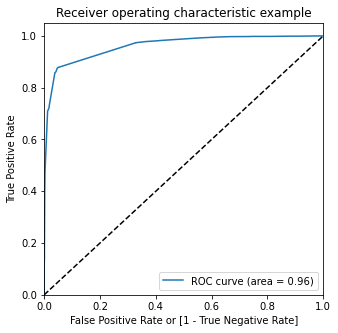

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The model looks good as it far away from the diagonal. 96% area is covered under the curve. 

#### Finding the optimal cut off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.190441,618332,0,1,1,0,0,0,0,0,0,0,0
1,1,0.999132,605316,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009162,655685,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000921,581653,0,1,0,0,0,0,0,0,0,0,0
4,1,0.728221,619035,1,1,1,1,1,1,1,1,1,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.784691  0.973968  0.670807
0.2   0.2  0.921598  0.879264  0.947070
0.3   0.3  0.922610  0.879264  0.948690
0.4   0.4  0.921767  0.861311  0.958142
0.5   0.5  0.922610  0.858169  0.961383
0.6   0.6  0.922610  0.858169  0.961383
0.7   0.7  0.921767  0.854578  0.962193
0.8   0.8  0.887034  0.728905  0.982177
0.9   0.9  0.882988  0.708707  0.987848


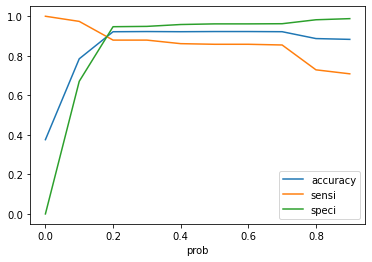

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The accuracy, sensitivity and specificity lines are intersecting at 0.2 probability. So, we will proceed with this value.

#### Evaluating the model with optimal probability cutoff as 0.2

In [161]:
# From the above plot we get to know that 0.29 is the optimum point to take it as a cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.190441,618332,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.999132,605316,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009162,655685,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000921,581653,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.728221,619035,1,1,1,1,1,1,1,1,1,0,0,1


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9215983813859383

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3507,  196],
       [ 269, 1959]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8792639138240574

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.947069943289225

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.947069943289225

In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9090487238979118


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.928760593220339


#### Sensityvity of the model is now 87%

#### Precision and Recall

In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3560,  143],
       [ 316, 1912]], dtype=int64)

##### Precision
TP / TP + FP

In [171]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9304136253041363

##### Recall
TP / TP + FN

In [172]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8581687612208259

Using sklearn utilities for the same

In [173]:
from sklearn.metrics import precision_score, recall_score

In [174]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9304136253041363

In [175]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8581687612208259

#### Precision and Recall Trade-off

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: predicted, Length: 5931, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

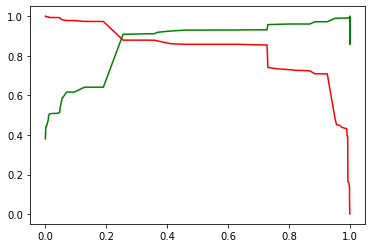

In [179]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making Predictions on the test set:

In [180]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website','Page Views Per Visit']])



In [181]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Lead Quality_Might be,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,
590700,0,0,0,0,0,0,0,0,0,0,0,0,0
594833,0,0,0,0,0,0,0,0,0,0,1,0,1
600817,0,0,0,0,1,0,0,0,0,0,1,0,0
656621,0,0,0,0,1,0,0,0,0,1,0,0,0
580732,1,0,0,0,0,1,0,0,0,0,0,0,0


In [182]:
X_test_sm = sm.add_constant(X_test)

In [183]:
# Making prediction on the test set:
y_test_pred = res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

Lead Number
590700    0.046724
594833    0.993033
600817    0.190441
656621    0.000174
580732    0.001341
645114    0.000921
622288    0.000200
642070    0.000921
584463    0.925998
654491    0.190441
dtype: float64

In [185]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [186]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
590700,0.046724
594833,0.993033
600817,0.190441
656621,0.000174
580732,0.001341


In [187]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [188]:
#Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [189]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [191]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,590700,0.046724
1,1,594833,0.993033
2,0,600817,0.190441
3,0,656621,0.000174
4,0,580732,0.001341


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [193]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,590700,0.046724
1,1,594833,0.993033
2,0,600817,0.190441
3,0,656621,0.000174
4,0,580732,0.001341


In [194]:
# Creating predicted column with 0.2 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [195]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,590700,0.046724,0
1,1,594833,0.993033,1
2,0,600817,0.190441,0
3,0,656621,0.000174,0
4,0,580732,0.001341,0


In [196]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9201730239874164

In [197]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1498,   82],
       [ 121,  842]], dtype=int64)

In [198]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8792639138240574

In [200]:
# Let us calculate specificity
TN / float(TN+FP)

0.947069943289225

#### Sensitivity of the prediction over test data set is 87%

## Calculating the lead score

Lead Score = 100 * ConversionProbability

In [201]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,590700,0.046724,0
1,1,594833,0.993033,1
2,0,600817,0.190441,0
3,0,656621,0.000174,0
4,0,580732,0.001341,0


In [202]:

# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.190441,618332,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.999132,605316,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009162,655685,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000921,581653,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.728221,619035,1,1,1,1,1,1,1,1,1,0,0,1


In [203]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,618332,1,0.190441,0
1,605316,1,0.999132,1
2,655685,0,0.009162,0
3,581653,0,0.000921,0
4,619035,1,0.728221,1


In [204]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,618332,1,0.190441,0
1,605316,1,0.999132,1
2,655685,0,0.009162,0
3,581653,0,0.000921,0
4,619035,1,0.728221,1


In [205]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5931, 4)
(2543, 4)
(8474, 4)


In [206]:
# Ensuring the Lead Numbers are unique for each lead in the finl dataframe
len(lead_full_pred['Lead Number'].unique().tolist())

8474

In [207]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,618332,1,0.190441,0,19
1,605316,1,0.999132,1,100
2,655685,0,0.009162,0,1
3,581653,0,0.000921,0,0
4,619035,1,0.728221,1,73


In [208]:
# Inspecing the max Lead Number
lead_full_pred['Lead Number'].max()

660737

In [209]:
# Making the Lead Number column as index

lead_full_pred = lead_full_pred.set_index('Lead Number').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
Lead Number,,,,
579533,1,0.925998,1,93
579538,1,0.728221,1,73
579545,0,0.126883,0,13
579546,0,0.358269,1,36
579564,1,0.765102,1,77


In [210]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                               -1.35
Lead Origin_Lead Add Form                   2.09
Lead Source_Welingak Website                2.75
Last Activity_Olark Chat Conversation      -1.53
Lead Quality_Might  be                     -3.97
Lead Quality_Worst                         -2.25
Tags_Busy                                   2.47
Tags_Closed by Horizzon                    10.06
Tags_Lost to EINS                           9.98
Tags_Ringing                               -1.67
Tags_Will revert after reading the email    5.54
Tags_switched off                          -2.56
Last Notable Activity_SMS Sent              2.43
dtype: float64

In [211]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -13.38
Lead Origin_Lead Add Form                   20.77
Lead Source_Welingak Website                27.36
Last Activity_Olark Chat Conversation      -15.19
Lead Quality_Might  be                     -39.50
Lead Quality_Worst                         -22.38
Tags_Busy                                   24.57
Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           99.20
Tags_Ringing                               -16.58
Tags_Will revert after reading the email    55.09
Tags_switched off                          -25.47
Last Notable Activity_SMS Sent              24.18
dtype: float64

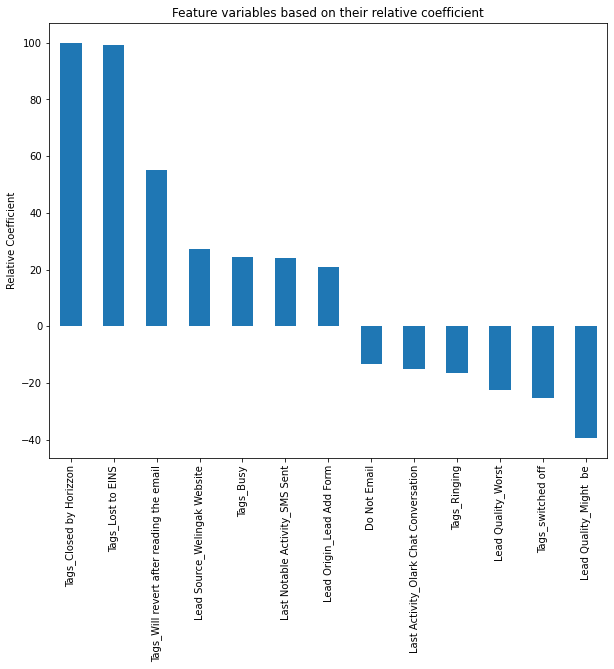

In [212]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [213]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Closed by Horizzon,100.00
8,Tags_Lost to EINS,99.20
10,Tags_Will revert after reading the email,55.09


#### Report
* Top 3 variables that contributing to convert a lead are:
    - *** Tags_Closed by Horizzon ***
    - *** Tags_Lost to EINS ***
    - *** Tag_We will revert after reading the email ***
* Top 3 variables that need improvement to convert a lead are:
    - *** Lead Quality_ Might Be ***
    - *** Tag_switched off ***
    - *** Lead Quality_Worst ***
    
*** Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. ***

*** High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. ***